## Importing Libraries

In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import math
import matplotlib.pyplot as plt 
import seaborn as sns 
import plotly as py
import plotly.graph_objs as go
import warnings
import os
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

warnings.filterwarnings("ignore")
py.offline.init_notebook_mode(connected = True)

plt.rcParams['font.family'].insert(0, 'Malgun Gothic')
sns.set(font="Malgun Gothic", rc = {"axes.unicode_minus":False}, style='whitegrid')
plt.rcParams["figure.figsize"] = (15, 6)

#print(os.listdir("../input"))

## Data Exploration

In [2]:
df = pd.read_csv('../../Data/df_제휴사_고객별.csv')
df.head()

,고객번호,성별,연령대,거주지,LPoint,휴일,제휴사_B,제휴사_C,제휴사_D,제휴사_E,...,여름,가을,겨울,오전,오후,저녁,새벽,이용금액_총합,이용금액_평균,이용건수
0,M000034966,여성,40,Z07,0.0,1.000000,0.0,0.0,1.0,0.0,...,0.0,1.000000,0.000000,1.0,0.000000,0.000000,0.0,3900,3900.00,1
1,M000059535,여성,30,Z12,0.0,0.000000,0.0,1.0,0.0,0.0,...,0.0,0.000000,0.000000,0.0,1.000000,0.000000,0.0,46000,46000.00,1
2,M000136117,여성,30,Z11,0.0,0.333333,0.0,0.0,1.0,0.0,...,0.2,0.466667,0.133333,0.2,0.333333,0.466667,0.0,237400,15826.67,15
3,M000225114,여성,40,Z17,0.0,0.800000,0.0,0.8,0.2,0.0,...,0.2,0.500000,0.300000,0.2,0.400000,0.400000,0.0,316200,31620.00,10
4,M000261625,여성,40,Z17,0.0,1.000000,0.0,0.0,1.0,0.0,...,0.0,0.000000,0.000000,0.0,1.000000,0.000000,0.0,23250,23250.00,1


In [3]:
df.shape

(21769, 23)

In [4]:
df.describe()

,연령대,LPoint,휴일,제휴사_B,제휴사_C,제휴사_D,제휴사_E,채널_1,채널_2,봄,여름,가을,겨울,오전,오후,저녁,새벽,이용금액_총합,이용금액_평균,이용건수
count,21769.000000,21769.000000,21769.000000,21769.000000,21769.000000,21769.000000,21769.000000,21769.000000,21769.000000,21769.000000,21769.000000,21769.000000,21769.000000,21769.000000,21769.000000,21769.000000,21769.000000,2.176900e+04,2.176900e+04,21769.000000
mean,36.528550,0.048176,0.404903,0.031582,0.332966,0.616648,0.018594,0.833001,0.166999,0.204091,0.337149,0.364230,0.094530,0.162478,0.562435,0.260297,0.014790,2.296166e+05,2.272825e+04,11.406312
std,10.728607,0.148543,0.325587,0.135391,0.384335,0.397289,0.113935,0.298756,0.298756,0.248431,0.280669,0.293817,0.179736,0.230590,0.308975,0.278799,0.076564,9.921810e+05,1.795496e+05,11.610991
min,20.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000e+02,5.000000e+02,1.000000
25%,30.000000,0.000000,0.125000,0.000000,0.000000,0.205882,0.000000,0.800000,0.000000,0.000000,0.100000,0.133333,0.000000,0.000000,0.357143,0.000000,0.000000,3.400000e+04,8.000000e+03,3.000000
50%,40.000000,0.000000,0.357143,0.000000,0.130435,0.758621,0.000000,1.000000,0.000000,0.142857,0.315789,0.333333,0.000000,0.076923,0.576923,0.200000,0.000000,1.030000e+05,1.170000e+04,10.000000
75%,40.000000,0.000000,0.625000,0.000000,0.666667,1.000000,0.000000,1.000000,0.200000,0.304348,0.500000,0.500000,0.117647,0.250000,0.800000,0.400000,0.000000,2.085400e+05,1.707931e+04,15.000000
max,70.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,7.841961e+07,2.376560e+07,261.000000


## Data Visualization

In [5]:
plt.style.use('fivethirtyeight')

### Histograms

In [6]:
df.columns

Index(['고객번호', '성별', '연령대', '거주지', 'LPoint', '휴일', '제휴사_B', '제휴사_C', '제휴사_D',
       '제휴사_E', '채널_1', '채널_2', '봄', '여름', '가을', '겨울', '오전', '오후', '저녁', '새벽',
       '이용금액_총합', '이용금액_평균', '이용건수'],
      dtype='object')

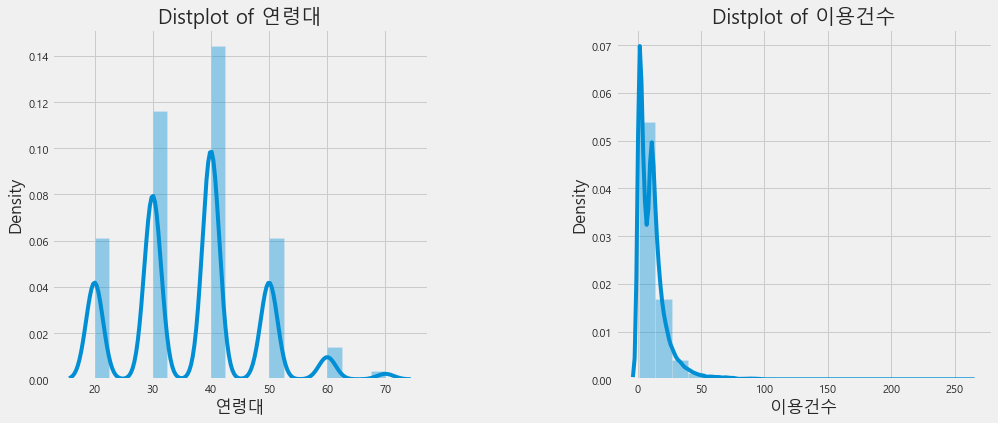

In [7]:
n = 0 
for x in ['연령대', '이용건수']:
    n += 1
    plt.subplot(1 , 2 , n)
    plt.subplots_adjust(hspace =0.5 , wspace = 0.5)
    sns.distplot(df[x] , bins = 20)
    plt.title('Distplot of {}'.format(x))
plt.show()

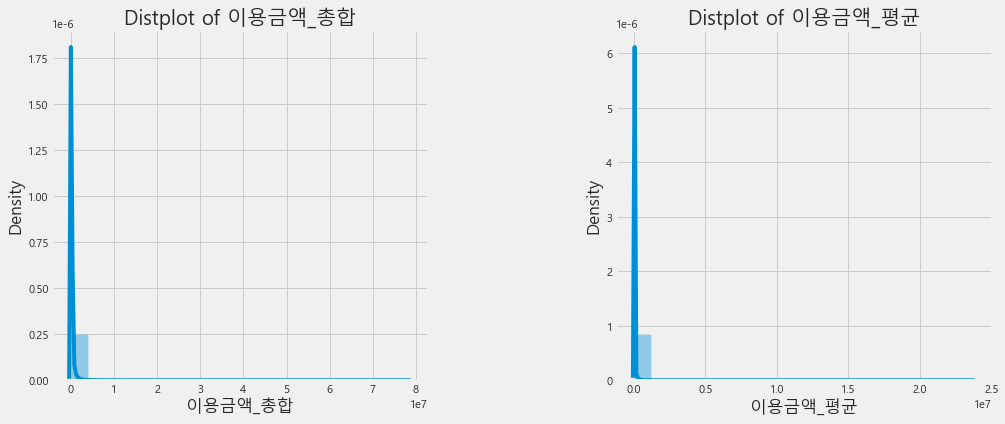

In [8]:
n = 0 
for x in ['이용금액_총합', '이용금액_평균']:
    n += 1
    plt.subplot(1 , 2 , n)
    plt.subplots_adjust(hspace =0.5 , wspace = 0.5)
    sns.distplot(df[x] , bins = 20)
    plt.title('Distplot of {}'.format(x))
plt.show()

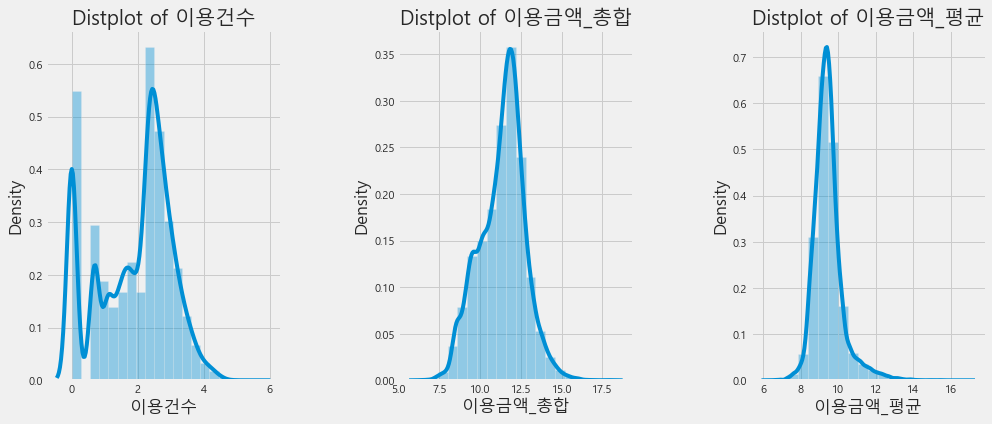

In [9]:
# 이용건수, 이용금액_총합, 이용금액_평균 log변환

n = 0 
for x in ['이용건수', '이용금액_총합', '이용금액_평균']:
    n += 1
    plt.subplot(1 , 3 , n)
    plt.subplots_adjust(hspace =0.5 , wspace = 0.5)
    df[x] = df[x].apply(lambda x: math.log(x))
    sns.distplot(df[x] , bins = 20)
    plt.title('Distplot of {}'.format(x))
plt.show()

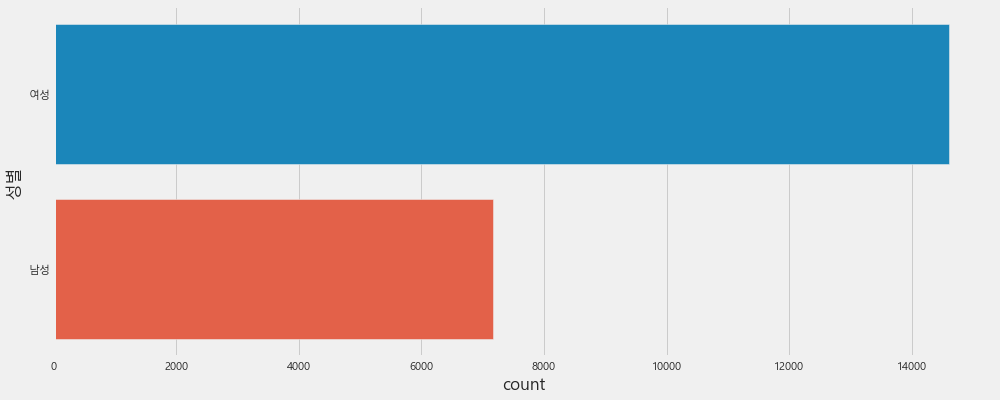

In [10]:
sns.countplot(y = '성별' , data = df)
plt.show()

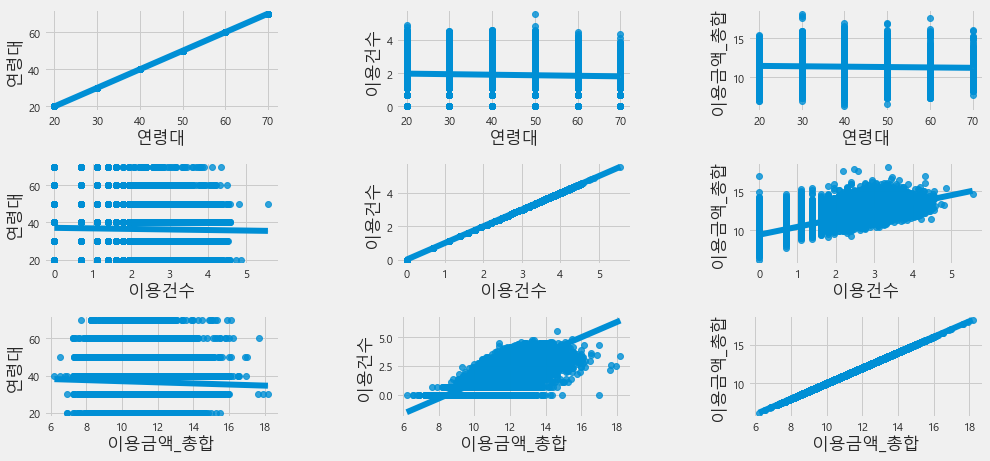

In [11]:
plt.figure(1 , figsize = (15 , 7))
n = 0 
for x in ['연령대', '이용건수', '이용금액_총합']:
    for y in ['연령대', '이용건수', '이용금액_총합']:
        n += 1
        plt.subplot(3 , 3 , n)
        plt.subplots_adjust(hspace = 0.5 , wspace = 0.5)
        sns.regplot(x = x , y = y , data = df)
        plt.ylabel(y.split()[0]+' '+y.split()[1] if len(y.split()) > 1 else y )
plt.show()

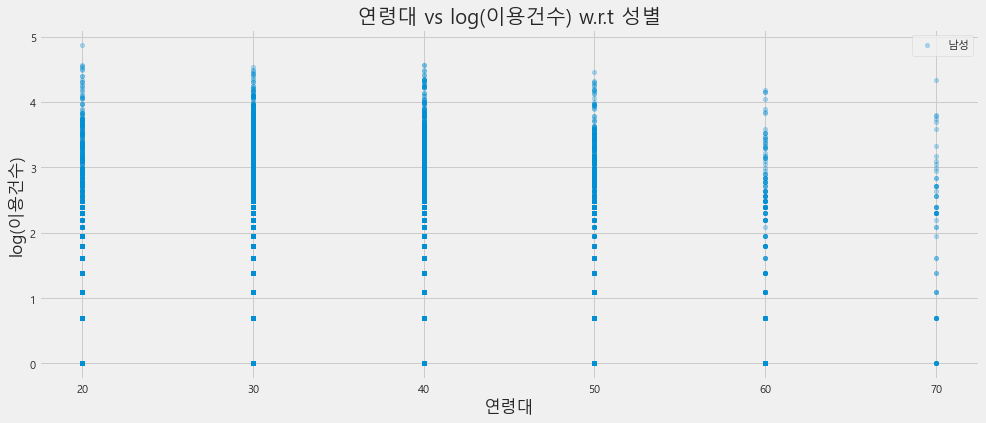

In [12]:
plt.figure(2 , figsize = (15 , 6))
plt.scatter(x = '연령대' , y = '이용건수' , data = df[df['성별'] == '남성'] ,
                s = 20 , alpha = 0.3 , label = '남성')
plt.xlabel('연령대'), plt.ylabel('log(이용건수)') 
plt.title('연령대 vs log(이용건수) w.r.t 성별')
plt.legend()
plt.show()

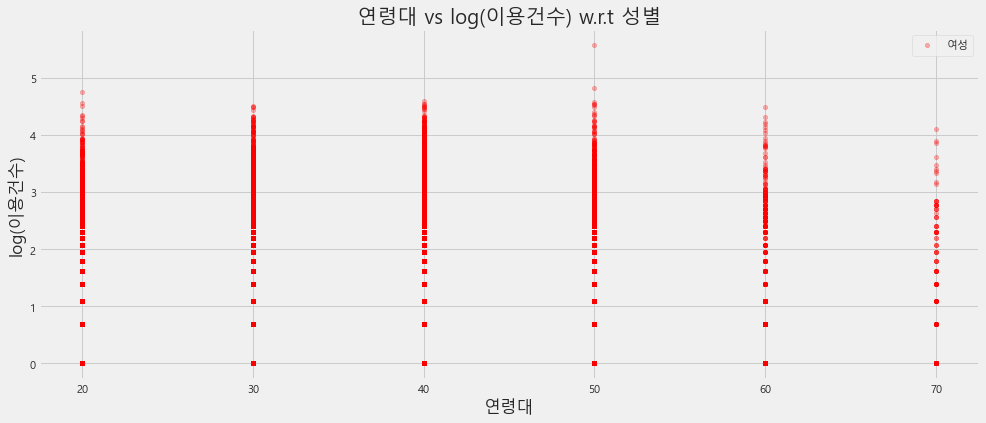

In [13]:
plt.figure(1 , figsize = (15 , 6))
plt.scatter(x = '연령대' , y = '이용건수' , data = df[df['성별'] == '여성'] ,
                s = 20 , color='red', alpha = 0.3 , label = '여성')
plt.xlabel('연령대'), plt.ylabel('log(이용건수)') 
plt.title('연령대 vs log(이용건수) w.r.t 성별')
plt.legend()
plt.show()

In [14]:
print('남성 이용건수 : ', sum(df[df['성별']=='남성']['이용건수']))
print('여성 이용건수 : ', sum(df[df['성별']=='여성']['이용건수']))

남성 이용건수 :  13725.56768848696
여성 이용건수 :  27965.9972647933


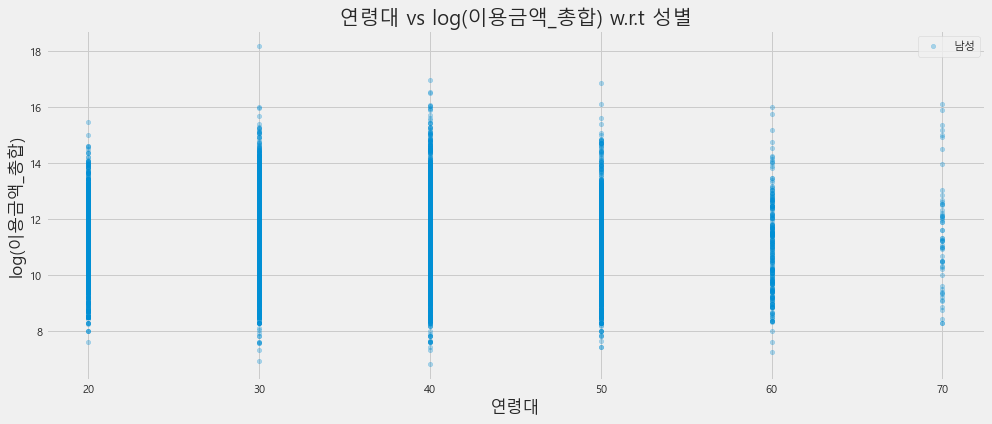

In [15]:
plt.figure(2 , figsize = (15 , 6))
plt.scatter(x = '연령대' , y = '이용금액_총합' , data = df[df['성별'] == '남성'] ,
                s = 20 , alpha = 0.3 , label = '남성')
plt.xlabel('연령대'), plt.ylabel('log(이용금액_총합)') 
plt.title('연령대 vs log(이용금액_총합) w.r.t 성별')
plt.legend()
plt.show()

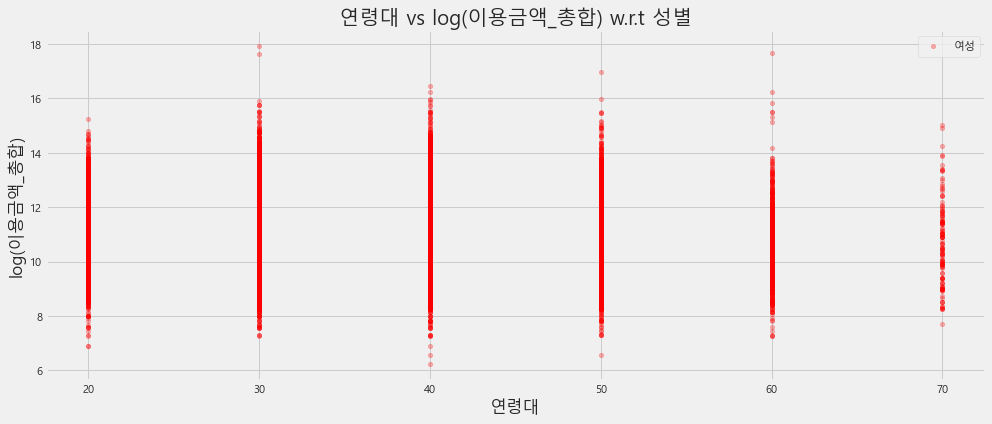

In [16]:
plt.figure(2 , figsize = (15 , 6))
plt.scatter(x = '연령대' , y = '이용금액_총합' , data = df[df['성별'] == '여성'] ,
                s = 20 , alpha = 0.3 , color='red', label = '여성')
plt.xlabel('연령대'), plt.ylabel('log(이용금액_총합)') 
plt.title('연령대 vs log(이용금액_총합) w.r.t 성별')
plt.legend()
plt.show()

KeyboardInterrupt: 

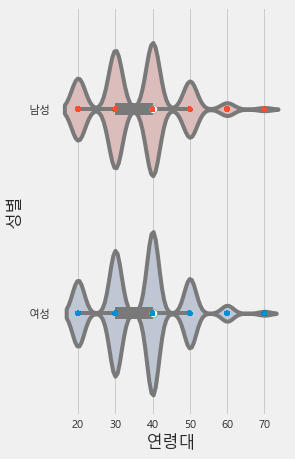

In [17]:
plt.figure(1 , figsize = (15 , 7))
n = 0 
for cols in ['연령대', '이용건수', '이용금액_총합']:
    n += 1 
    plt.subplot(1 , 3 , n)
    plt.subplots_adjust(hspace = 0.5 , wspace = 0.5)
    sns.violinplot(x = cols , y = '성별' , data = df , palette = 'vlag')
    sns.swarmplot(x = cols , y = '성별' , data = df)
    plt.ylabel('성별' if n == 1 else '')
    plt.title('Boxplots & Swarmplots' if n == 2 else '')
plt.show()

## Clustering using K-means

### 1. Segmentation using 연령대, 이용금액_총합

In [18]:
'''연령대 and 이용금액_총합'''
X1 = df[['연령대' , '이용금액_총합']].iloc[: , :].values
inertia = []
for n in range(1 , 11):
    algorithm = (KMeans(n_clusters = n ,init='k-means++', n_init = 10 ,max_iter=300, 
                        tol=0.0001,  random_state= 111  , algorithm='elkan') )
    algorithm.fit(X1)
    inertia.append(algorithm.inertia_)

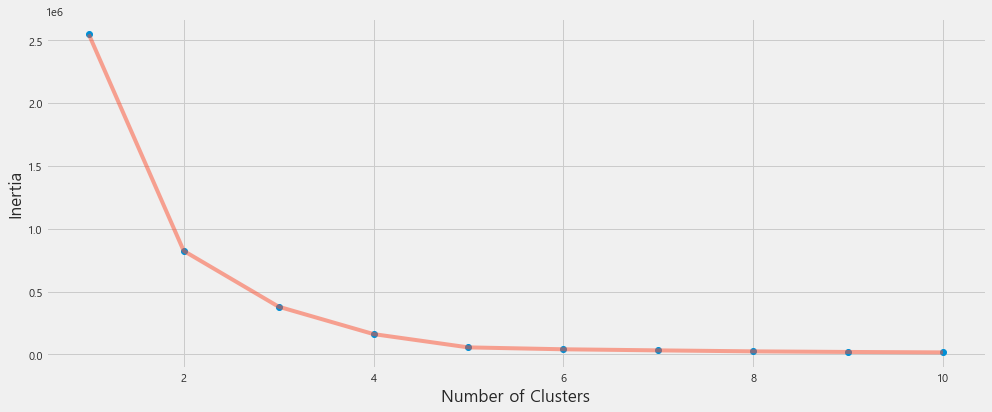

In [19]:
plt.figure(1 , figsize = (15 ,6))
plt.plot(np.arange(1 , 11) , inertia , 'o')
plt.plot(np.arange(1 , 11) , inertia , '-' , alpha = 0.5)
plt.xlabel('Number of Clusters') , plt.ylabel('Inertia')
plt.show()

In [38]:
algorithm = (KMeans(n_clusters = 4 ,init='k-means++', n_init = 10 ,max_iter=300, 
                        tol=0.0001,  random_state= 111  , algorithm='elkan') )
algorithm.fit(X1)
labels1 = algorithm.labels_
centroids1 = algorithm.cluster_centers_

In [39]:
h = 0.02
x_min, x_max = X1[:, 0].min() - 1, X1[:, 0].max() + 1
y_min, y_max = X1[:, 1].min() - 1, X1[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
Z = algorithm.predict(np.c_[xx.ravel(), yy.ravel()]) 

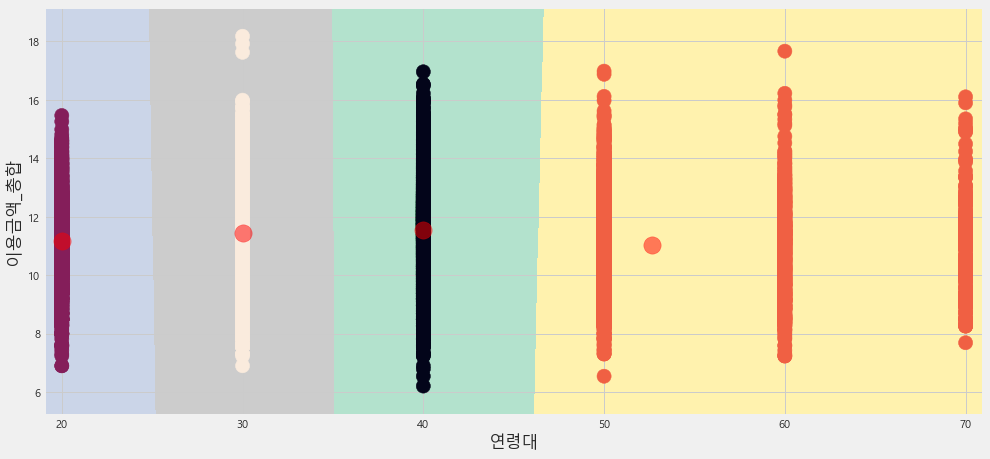

In [40]:
plt.figure(1 , figsize = (15 , 7) )
plt.clf()
Z = Z.reshape(xx.shape)
plt.imshow(Z , interpolation='nearest', 
           extent=(xx.min(), xx.max(), yy.min(), yy.max()),
           cmap = plt.cm.Pastel2, aspect = 'auto', origin='lower')

plt.scatter( x = '연령대' ,y = '이용금액_총합' , data = df , c = labels1 , 
            s = 200 )
plt.scatter(x = centroids1[: , 0] , y =  centroids1[: , 1] , s = 300 , c = 'red' , alpha = 0.5)
plt.ylabel('이용금액_총합') , plt.xlabel('연령대')
plt.show()

### 2. Segmentation using 연령대, 이용건수

In [23]:
'''연령대, 이용건수'''
X2 = df[['연령대', '이용건수']].iloc[: , :].values
inertia = []
for n in range(1 , 11):
    algorithm = (KMeans(n_clusters = n ,init='k-means++', n_init = 10 ,max_iter=300, 
                        tol=0.0001,  random_state= 111  , algorithm='elkan') )
    algorithm.fit(X2)
    inertia.append(algorithm.inertia_)

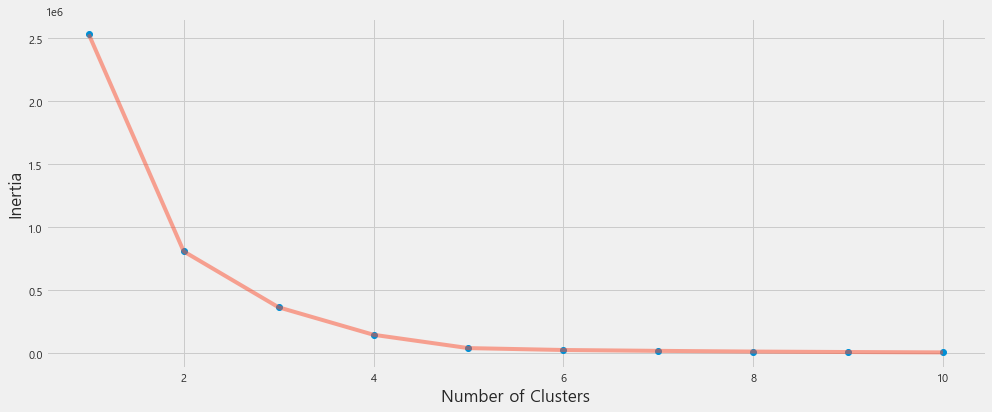

In [24]:
plt.figure(1 , figsize = (15 ,6))
plt.plot(np.arange(1 , 11) , inertia , 'o')
plt.plot(np.arange(1 , 11) , inertia , '-' , alpha = 0.5)
plt.xlabel('Number of Clusters') , plt.ylabel('Inertia')
plt.show()

In [25]:
algorithm = (KMeans(n_clusters = 5 ,init='k-means++', n_init = 10 ,max_iter=300, 
                        tol=0.0001,  random_state= 111  , algorithm='elkan') )
algorithm.fit(X2)
labels2 = algorithm.labels_
centroids2 = algorithm.cluster_centers_

In [26]:
h = 0.02
x_min, x_max = X2[:, 0].min() - 1, X2[:, 0].max() + 1
y_min, y_max = X2[:, 1].min() - 1, X2[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
Z2 = algorithm.predict(np.c_[xx.ravel(), yy.ravel()]) 

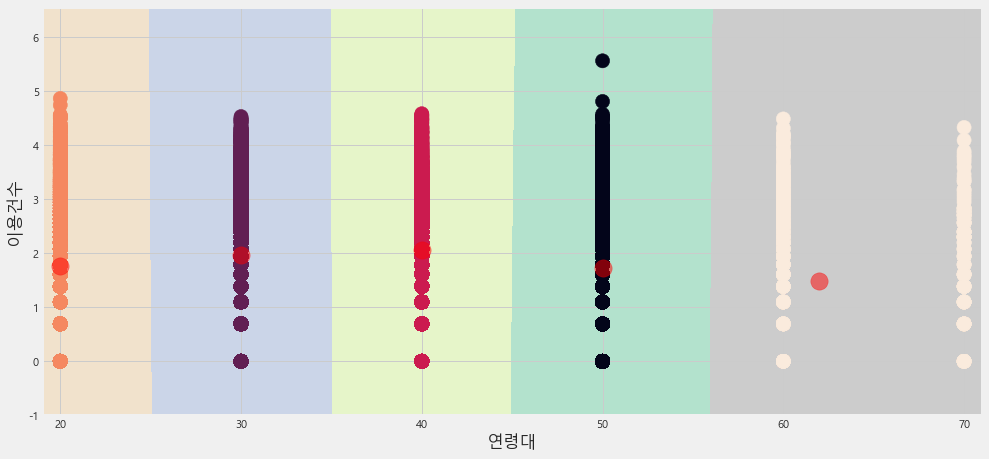

In [27]:
plt.figure(1 , figsize = (15 , 7) )
plt.clf()
Z2 = Z2.reshape(xx.shape)
plt.imshow(Z2 , interpolation='nearest', 
           extent=(xx.min(), xx.max(), yy.min(), yy.max()),
           cmap = plt.cm.Pastel2, aspect = 'auto', origin='lower')

plt.scatter( x = '연령대' ,y = '이용건수' , data = df , c = labels2 , 
            s = 200 )
plt.scatter(x = centroids2[: , 0] , y =  centroids2[: , 1] , s = 300 , c = 'red' , alpha = 0.5)
plt.ylabel('이용건수') , plt.xlabel('연령대')
plt.show()

### 3. Segmentation using 연령대, 이용건수, 이용금액_총합

In [28]:
X3 = df[['연령대', '이용건수', '이용금액_총합']].iloc[: , :].values
inertia = []
for n in range(1 , 11):
    algorithm = (KMeans(n_clusters = n ,init='k-means++', n_init = 10 ,max_iter=300, 
                        tol=0.0001,  random_state= 111  , algorithm='elkan') )
    algorithm.fit(X3)
    inertia.append(algorithm.inertia_)

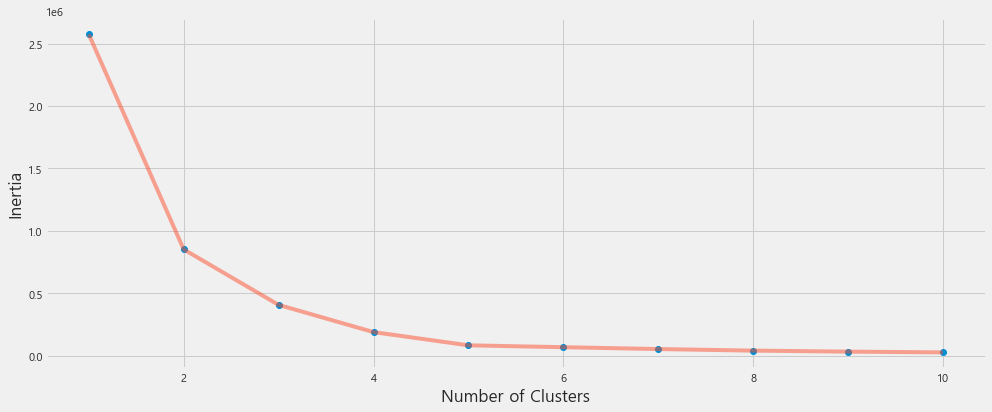

In [29]:
plt.figure(1 , figsize = (15 ,6))
plt.plot(np.arange(1 , 11) , inertia , 'o')
plt.plot(np.arange(1 , 11) , inertia , '-' , alpha = 0.5)
plt.xlabel('Number of Clusters') , plt.ylabel('Inertia')
plt.show()

In [30]:
algorithm = (KMeans(n_clusters = 5 ,init='k-means++', n_init = 10 ,max_iter=300, 
                        tol=0.0001,  random_state= 111  , algorithm='elkan') )
algorithm.fit(X3)
labels3 = algorithm.labels_
centroids3 = algorithm.cluster_centers_

In [31]:
df['label3'] =  labels3
trace1 = go.Scatter3d(
    x= df['연령대'],
    y= df['이용건수'],
    z= df['이용금액_총합'],
    mode='markers',
     marker=dict(
        color = df['label3'], 
        size= 20,
        line=dict(
            color= df['label3'],
            width= 12
        ),
        opacity=0.8
     )
)
data = [trace1]
layout = go.Layout(
#     margin=dict(
#         l=0,
#         r=0,
#         b=0,
#         t=0
#     )
    title= 'Clusters',
    scene = dict(
            xaxis = dict(title  = '연령대'),
            yaxis = dict(title  = '이용건수'),
            zaxis = dict(title  = '이용금액_총합')
        )
)
fig = go.Figure(data=data, layout=layout)
py.offline.iplot(fig)

### 4. 다 넣기

In [41]:
df.columns

Index(['고객번호', '성별', '연령대', '거주지', 'LPoint', '휴일', '제휴사_B', '제휴사_C', '제휴사_D',
       '제휴사_E', '채널_1', '채널_2', '봄', '여름', '가을', '겨울', '오전', '오후', '저녁', '새벽',
       '이용금액_총합', '이용금액_평균', '이용건수', 'label3'],
      dtype='object')

In [42]:
df2 = pd.get_dummies(df, columns=['성별'])

In [43]:
X4 = df2[['성별_남성', '성별_여성', 'LPoint', '휴일', 
         '제휴사_B', '제휴사_C', '제휴사_D','제휴사_E',
         '채널_1', '채널_2',
         '봄', '여름', '가을', '겨울',
         '오전', '오후', '저녁', '새벽',
         '이용금액_총합', '이용건수']].iloc[: , :].values
inertia = []
for n in range(1 , 11):
    algorithm = (KMeans(n_clusters = n ,init='k-means++', n_init = 10 ,max_iter=300, 
                        tol=0.0001,  random_state= 111  , algorithm='elkan') )
    algorithm.fit(X4)
    inertia.append(algorithm.inertia_)

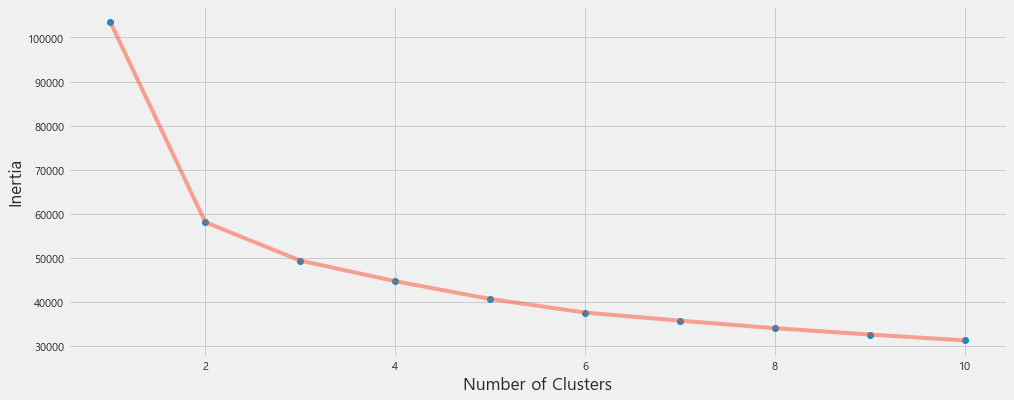

In [44]:
plt.figure(1 , figsize = (15 ,6))
plt.plot(np.arange(1 , 11) , inertia , 'o')
plt.plot(np.arange(1 , 11) , inertia , '-' , alpha = 0.5)
plt.xlabel('Number of Clusters') , plt.ylabel('Inertia')
plt.show()

In [45]:
algorithm = (KMeans(n_clusters =2 ,init='k-means++', n_init = 10 ,max_iter=300, 
                        tol=0.0001,  random_state= 111  , algorithm='elkan') )
algorithm.fit(X4)
labels4 = algorithm.labels_
centroids4 = algorithm.cluster_centers_

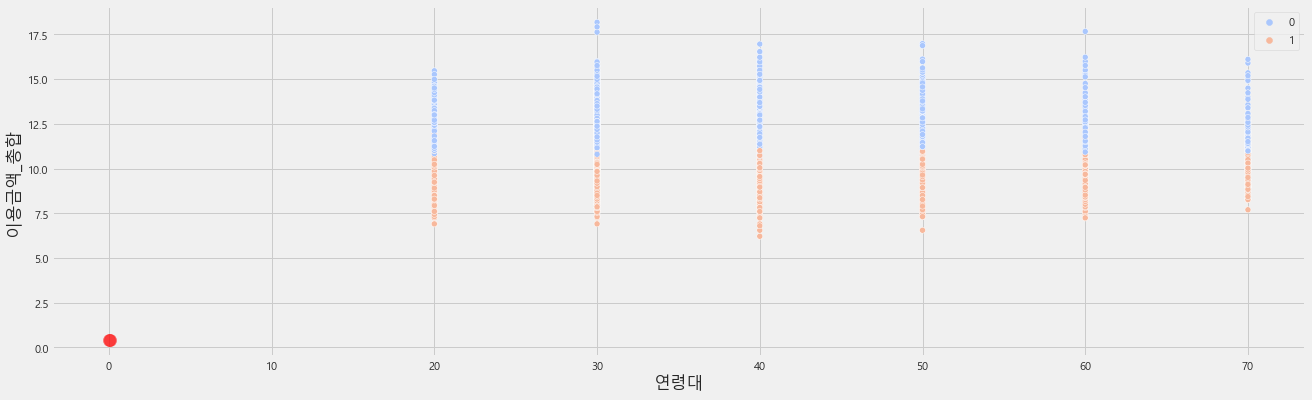

In [46]:
plt.figure(figsize=(20, 6))
sns.scatterplot(x='연령대', y='이용금액_총합', data=df2, hue=labels4, palette='coolwarm')
plt.scatter(centroids4[:, 2], centroids4[:, 3], c='red', alpha=0.5, s=150)